In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ema_workbench import load_results
from ema_workbench.analysis import feature_scoring

In [27]:
glob_experiments, glob_results = load_results('D:/juju/lumc/model/experiments/sens_global.tar.gz')

In [28]:
glob_experiments

,age_difference,immigration,intention,num_agents,seed,susceptibility,tolerance_of_diff,scenario,policy,model
0,10,1,0,1307.0,2.365569e+09,"(0.25, 0.75)","(0, 0.04)",0,None,MACEmodel
1,15,1,1,1401.0,2.161662e+09,"(0.75, 1)","(0, 0.04)",1,None,MACEmodel
2,2,0,1,2781.0,6.918483e+08,"(0.75, 1)","(0, 0.04)",2,None,MACEmodel
3,10,1,1,2618.0,3.031875e+08,"(0.75, 1)","(0.04, 0.09)",3,None,MACEmodel
4,2,1,0,1094.0,2.942915e+09,"(0.75, 1)","(0.1, 0.2)",4,None,MACEmodel
...,...,...,...,...,...,...,...,...,...,...
95,20,0,1,417.0,4.066505e+08,"(0, 0.5)","(0.1, 0.2)",95,None,MACEmodel
96,15,1,0,1892.0,3.148582e+09,"(0.75, 1)","(0.1, 0.2)",96,None,MACEmodel
97,5,1,1,2186.0,1.416974e+09,"(0, 0.5)","(0.04, 0.09)",97,None,MACEmodel
98,2,1,0,2883.0,2.040702e+09,"(0.25, 0.75)","(0, 0.04)",98,None,MACEmodel


Convert categorical to numerical

In [29]:
glob_experiments.dtypes

age_difference       category
immigration          category
intention            category
num_agents            float64
seed                  float64
susceptibility       category
tolerance_of_diff    category
scenario             category
policy               category
model                category
dtype: object

In [17]:
# for col in ["susceptibility", "tolerance_of_diff"]:
#     glob_experiments[col], mapping_index = pd.Series(glob_experiments[col]).factorize()

In [30]:
glob_results.keys()

dict_keys(['Year', 'Adults smoking', 'Youngsters smoking', 'MACE risk', 'Overweight Moroccan', 'Overweight Turkish', 'Overweight Hindustan', 'Overweight Dutch', 'Overweight Other', 'Overweight 18-24', 'Overweight 25-64', 'Overweight 65+', 'Overweight 12-17', 'Diabetes adults', 'Hypertension adults', 'Dyslipidemia adults', 'Diabetes youngsters', 'Hypertension youngsters', 'Dyslipidemia youngsters', 'MACE events', 'avg age MACE', 'low MACE risk Dutch', 'low MACE risk Turkish', 'low MACE risk Moroccan', 'low MACE risk Hindustan', 'low MACE risk Other', 'mid MACE risk Dutch', 'mid MACE risk Turkish', 'mid MACE risk Moroccan', 'mid MACE risk Hindustan', 'mid MACE risk Other', 'high MACE risk Dutch', 'high MACE risk Turkish', 'high MACE risk Moroccan', 'high MACE risk Hindustan', 'high MACE risk Other', 'low MACE risk mean age', 'mid MACE risk mean age', 'high MACE risk mean age', 'Amount 65+', 'Amount 25-65', 'Amount 18-24', 'Amount youngsters', 'Amount total'])

In [31]:
glob_results["avg age MACE"].mean(axis=1)

array([58.02160656, 61.33011188, 63.29909729, 64.16979128, 60.44615074,
               nan, 65.20054816,         nan, 63.90946387,         nan,
               nan, 62.18228845, 65.61133838, 61.29980069,         nan,
       65.82046143, 60.50970375, 61.27654752, 61.08271086,         nan,
       63.98673068, 64.53697004, 61.29449903, 60.92829994, 67.09180159,
       61.5020504 ,         nan, 65.01719353, 61.04902882, 63.04711372,
       60.73556452, 61.20961209, 61.83963   , 65.2321486 ,         nan,
       65.1154929 ,         nan, 63.44309504, 58.89873008, 63.35341019,
       62.10077614, 60.37959416, 57.08143434,         nan, 58.1933631 ,
       63.40906005, 56.5108278 , 64.30679782,         nan, 64.39229798,
       57.28709459, 63.10457468, 60.85344938, 63.55187376, 62.0043435 ,
       60.46607011, 62.85780821, 60.67943828, 59.763694  ,         nan,
       64.96221429, 65.94350718, 62.88571902, 62.79188376, 64.79122305,
       63.3854001 ,         nan, 62.76482346, 61.72529201,      

In [36]:
results = pd.DataFrame()
for col in ["MACE risk", "avg age MACE", "Adults smoking", "Youngsters smoking", "Overweight 12-17", "Overweight 18-24", "Overweight 25-64", "Overweight 65+"]:
    results = pd.concat([results, pd.Series(glob_results[col].mean(axis=1), name=col)], axis=1)

In [37]:
results["avg age MACE"] =results["avg age MACE"].reset_index().interpolate(method="pad")["avg age MACE"]

In [35]:
# results = pd.DataFrame()
# for col in ["MACE risk", "avg age MACE", "Adults smoking", "Youngsters smoking", "Overweight 12-17", "Overweight 18-24", "Overweight 25-64", "Overweight 65+"]:
#     results = pd.concat([results, pd.Series(glob_results[col][:, -1])], axis=1)

In [38]:
# results.fillna(50, inplace=True)

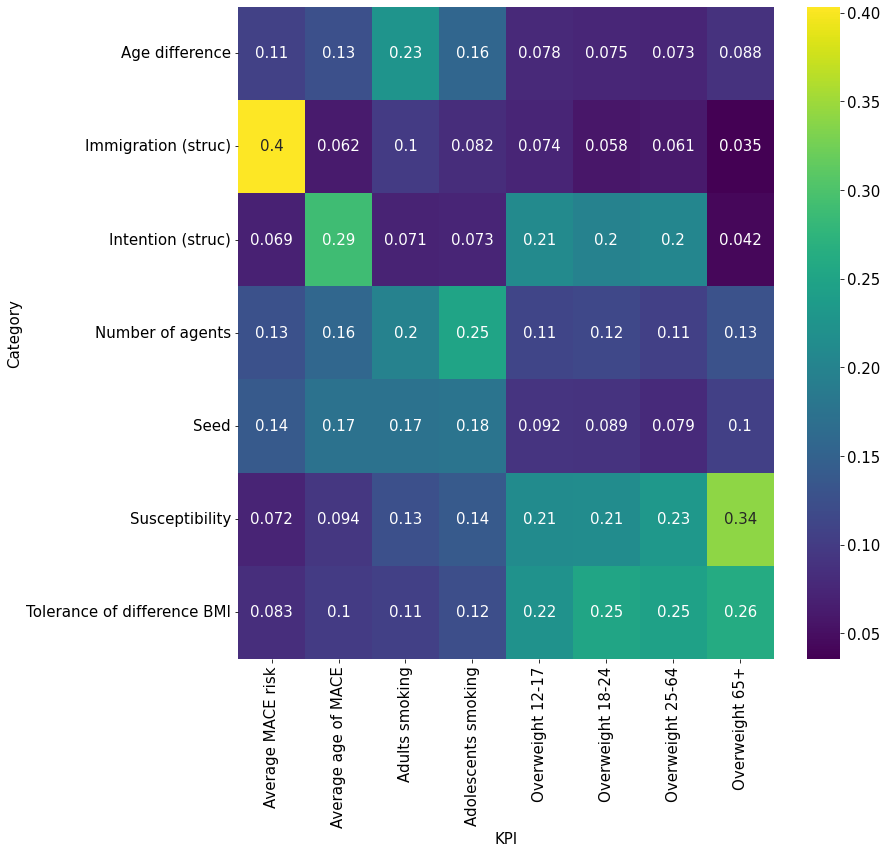

In [39]:
fig, ax = plt.subplots(1,1, figsize=(12,12))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)

fs = feature_scoring.get_feature_scores_all(glob_experiments, results)
sns.heatmap(fs, cmap="viridis", annot=True)

#plt.title("Feature scoring global senstivity analysis")
ax.set_ylabel("Category")
ax.set_xlabel("KPI")
ax.set_yticklabels(["Age difference", "Immigration (struc)", "Intention (struc)", "Number of agents", "Seed", "Susceptibility", "Tolerance of difference BMI"])
ax.set_xticklabels(["Average MACE risk", "Average age of MACE", "Adults smoking", "Adolescents smoking",  "Overweight 12-17", "Overweight 18-24", "Overweight 25-64", "Overweight 65+"])
plt.xticks(rotation = 90)

plt.savefig("D:/juju/lumc/msc_thesis/report/images/sens_global.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()

In [5]:
glob_results["MACE risk"][0][3:]

array([1.96604111, 1.9486271 , 1.84210526, 1.82291667, 1.7211704 ,
       1.79794521, 1.37221269, 1.43824027, 1.76619008, 1.61290323,
       1.76322418, 1.85810811, 1.60337553, 1.77065767, 2.12765957,
       1.95578231, 1.61016949, 1.5979815 , 2.17209691, 2.43902439,
       3.02775442, 3.03797468, 3.00171527, 3.83631714, 4.37017995,
       4.41941075, 4.08858603, 4.05172414, 3.96551724, 3.78006873,
       4.18848168, 4.10607357, 3.76390077, 3.08219178, 3.30788804,
       3.09012876, 2.73504274, 2.64505119, 2.05479452, 2.38704177,
       2.64957265, 2.48075278, 2.73972603, 2.61324042, 2.        ,
       2.01401051, 1.77619893])

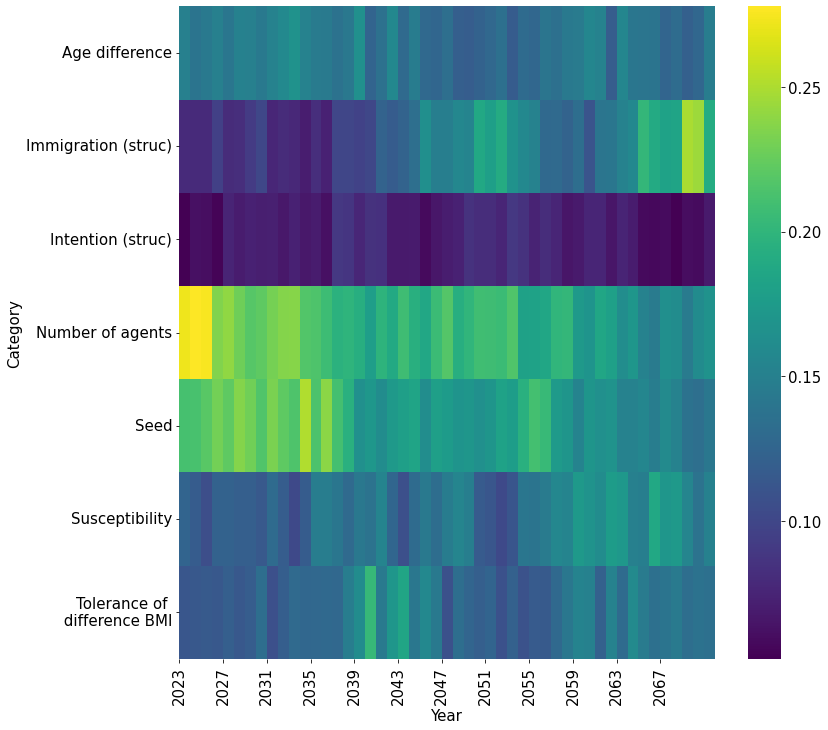

In [25]:
fig, ax = plt.subplots(1,1, figsize=(12,12))

font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)



fs = feature_scoring.get_feature_scores_all(glob_experiments, pd.DataFrame([i[1:] for i in glob_results["MACE risk"]])) #pd.DataFrame(glob_results["MACE risk"]))
sns.heatmap(fs, cmap="viridis", annot=False)

#plt.title("Feature scoring global senstivity analysis over time")
ax.set_ylabel("Category")
ax.set_xlabel("Year")

ax.set_xticks( range(0, len(glob_results["MACE risk"][0][3:]), 4))
ax.set_xticklabels(range(2023, 2023 + len(glob_results["MACE risk"][0][3:]), 4))
plt.xticks(rotation=90)

ax.set_yticklabels(["Age difference", "Immigration (struc)", "Intention (struc)", "Number of agents", "Seed", "Susceptibility", "Tolerance of \n difference BMI"])

plt.savefig("D:/juju/lumc/msc_thesis/report/images/sens_global_over_time.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()

In [48]:
experiments, results = load_results('D:/juju/lumc/model/experiments/sens_intention.tar.gz')

In [49]:
experiments_index = experiments.reset_index()

In [50]:
def processing(dataframe, data, experiments_index):
    df = pd.DataFrame(dataframe[data]).copy()
    df.reset_index(inplace=True)
    df = df.melt('index', var_name='cols', value_name='vals')
    df = pd.merge(df, experiments_index, on='index')
    return df

In [51]:
sensitivity = processing(results, "avg age MACE", experiments_index)

In [52]:
sensitivity = sensitivity.loc[sensitivity["cols"] >= 3]
sensitivity["cols"] -= 3


In [53]:
sensitivity

,index,cols,vals,age_difference,immigration,intention,num_agents,seed,susceptibility,tolerance_of_diff,scenario,policy,model
3,0,0,50.000000,2,1,0,1430.0,4.259503e+09,"(0, 0.5)","(0.1, 0.2)",200,None,MACEmodel
4,0,1,49.666667,2,1,0,1430.0,4.259503e+09,"(0, 0.5)","(0.1, 0.2)",200,None,MACEmodel
5,0,2,42.900000,2,1,0,1430.0,4.259503e+09,"(0, 0.5)","(0.1, 0.2)",200,None,MACEmodel
6,0,3,52.000000,2,1,0,1430.0,4.259503e+09,"(0, 0.5)","(0.1, 0.2)",200,None,MACEmodel
7,0,4,43.750000,2,1,0,1430.0,4.259503e+09,"(0, 0.5)","(0.1, 0.2)",200,None,MACEmodel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,24,42,71.000000,5,1,1,447.0,2.324556e+09,"(0.75, 1)","(0.1, 0.2)",224,None,MACEmodel
1246,24,43,74.000000,5,1,1,447.0,2.324556e+09,"(0.75, 1)","(0.1, 0.2)",224,None,MACEmodel
1247,24,44,73.333333,5,1,1,447.0,2.324556e+09,"(0.75, 1)","(0.1, 0.2)",224,None,MACEmodel
1248,24,45,53.500000,5,1,1,447.0,2.324556e+09,"(0.75, 1)","(0.1, 0.2)",224,None,MACEmodel


Immigration

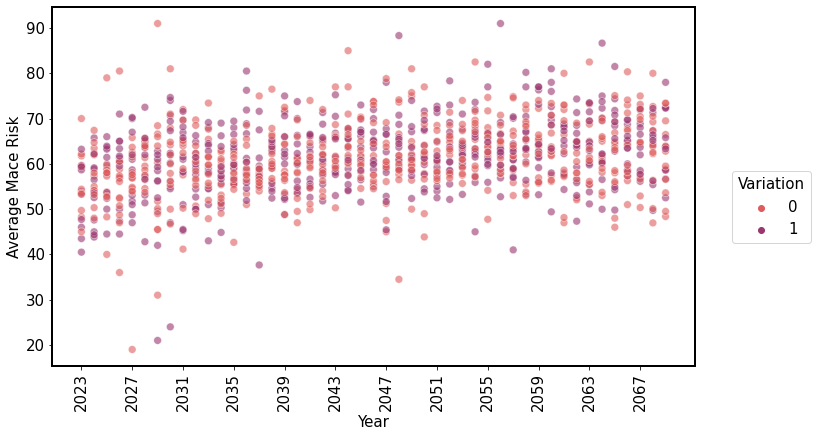

In [221]:
fig, ax = plt.subplots(1,1, figsize=(10,6))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)

what="immigration"

sns.scatterplot(data=sensitivity, x="cols", y="vals", s=60, hue=what, ax=ax, alpha=0.6, palette= sns.color_palette("flare", len(sensitivity[what].unique())), sizes=(50, 250), size_norm=(-.2, .8))


handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
# ax.legend([handles[0], handles[len(handles)//2], handles[-1]], [labels[0], labels[len(labels)//2], labels[-1]])

fig.legend([handles[0], handles[-1]], [labels[0], labels[-1]], loc='center right', bbox_to_anchor=(0.65, 0., 0.5, 1), title="Variation")
fig.tight_layout()

#plt.title('Sensitivity analysis, immigration')
plt.ylabel('Average Mace Risk')
plt.xlabel('Year')

ax.set_xticks(range(0, sensitivity.cols.max(), 4))
ax.set_xticklabels(range(2023, 2023 + sensitivity.cols.max(), 4))
plt.xticks(rotation=90)

plt.savefig("D:/juju/lumc/msc_thesis/report/images/sens_immigration.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()


Intention

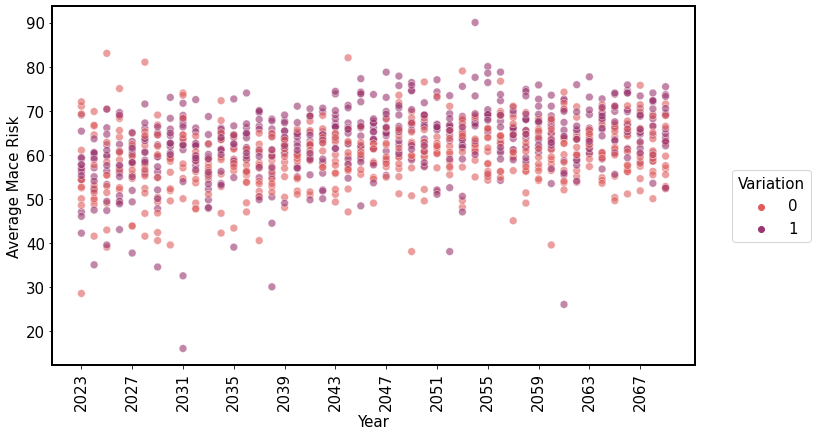

In [54]:
fig, ax = plt.subplots(1,1, figsize=(10,6))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)

what="intention"

sns.scatterplot(data=sensitivity, x="cols", y="vals", s=60, hue=what, ax=ax, alpha=0.6, palette= sns.color_palette("flare", len(sensitivity[what].unique())), sizes=(50, 250), size_norm=(-.2, .8))


handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
# ax.legend([handles[0], handles[len(handles)//2], handles[-1]], [labels[0], labels[len(labels)//2], labels[-1]])

fig.legend([handles[0], handles[-1]], [labels[0], labels[-1]], loc='center right', bbox_to_anchor=(0.65, 0., 0.5, 1), title="Variation")
fig.tight_layout()

#plt.title('Sensitivity analysis, intention')
plt.ylabel('Average Mace Risk')
plt.xlabel('Year')

ax.set_xticks(range(0, sensitivity.cols.max(), 4))
ax.set_xticklabels(range(2023, 2023 + sensitivity.cols.max(), 4))
plt.xticks(rotation=90)

plt.savefig("D:/juju/lumc/msc_thesis/report/images/sens_intention.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()


Susceptability

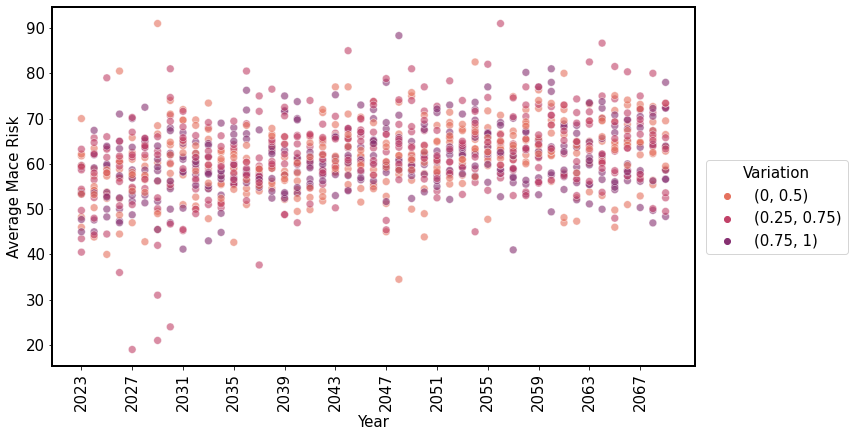

In [223]:
fig, ax = plt.subplots(1,1, figsize=(10,6))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)

what="susceptibility"

sns.scatterplot(data=sensitivity, x="cols", y="vals", s=60, hue=what, ax=ax, alpha=0.6, palette= sns.color_palette("flare", len(sensitivity[what].unique())), sizes=(50, 250), size_norm=(-.2, .8))


handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
# ax.legend([handles[0], handles[len(handles)//2], handles[-1]], [labels[0], labels[len(labels)//2], labels[-1]])

fig.legend([handles[0], handles[len(handles)//2], handles[-1]], [labels[0], labels[len(labels)//2], labels[-1]], loc='center right', bbox_to_anchor=(0.7, 0., 0.5, 1), title="Variation")
fig.tight_layout()

#plt.title('Sensitivity analysis, susceptibility')
plt.ylabel('Average Mace Risk')
plt.xlabel('Year')

ax.set_xticks(range(0, sensitivity.cols.max(), 4))
ax.set_xticklabels(range(2023, 2023 + sensitivity.cols.max(), 4))
plt.xticks(rotation=90)

plt.savefig("D:/juju/lumc/msc_thesis/report/images/sens_susceptibility.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()


TOlerance of difference BMI

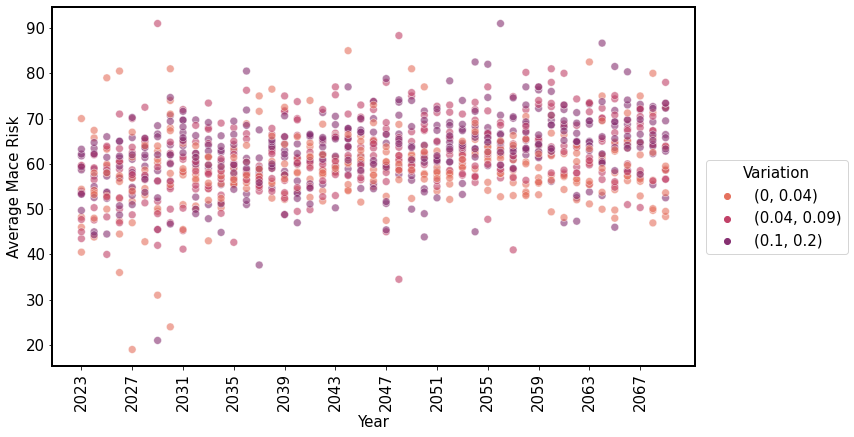

In [224]:
fig, ax = plt.subplots(1,1, figsize=(10,6))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)

what="tolerance_of_diff"

sns.scatterplot(data=sensitivity, x="cols", y="vals", s=60, hue=what, ax=ax, alpha=0.6, palette= sns.color_palette("flare", len(sensitivity[what].unique())), sizes=(50, 250), size_norm=(-.2, .8))


handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
# ax.legend([handles[0], handles[len(handles)//2], handles[-1]], [labels[0], labels[len(labels)//2], labels[-1]])

fig.legend([handles[0], handles[len(handles)//2], handles[-1]], [labels[0], labels[len(labels)//2], labels[-1]], loc='center right', bbox_to_anchor=(0.7, 0., 0.5, 1), title="Variation")
fig.tight_layout()

#plt.title('Sensitivity analysis, tolerance of difference in BMI')
plt.ylabel('Average Mace Risk')
plt.xlabel('Year')

ax.set_xticks(range(0, sensitivity.cols.max(), 4))
ax.set_xticklabels(range(2023, 2023 + sensitivity.cols.max(), 4))
plt.xticks(rotation=90)

plt.savefig("D:/juju/lumc/msc_thesis/report/images/sens_tolerance_of_differences.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()


Age difference

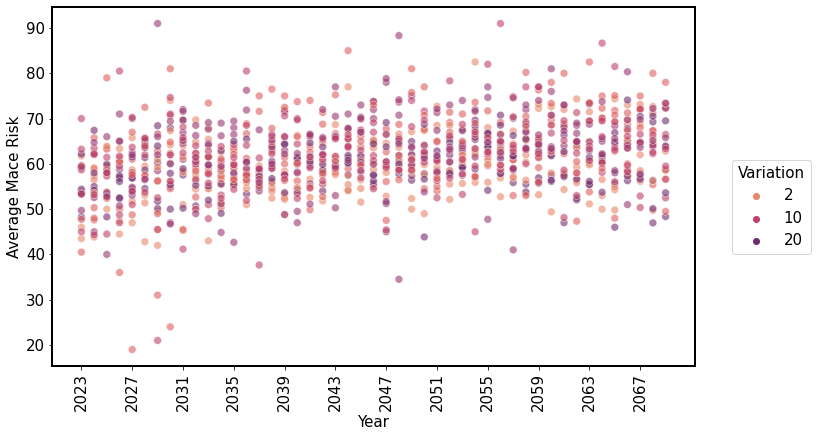

In [225]:
fig, ax = plt.subplots(1,1, figsize=(10,6))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)

what="age_difference"

sns.scatterplot(data=sensitivity, x="cols", y="vals", s=60, hue=what, ax=ax, alpha=0.6, palette= sns.color_palette("flare", len(sensitivity[what].unique())), sizes=(50, 250), size_norm=(-.2, .8))


handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
# ax.legend([handles[0], handles[len(handles)//2], handles[-1]], [labels[0], labels[len(labels)//2], labels[-1]])

fig.legend([handles[0], handles[len(handles)//2], handles[-1]], [labels[0], labels[len(labels)//2], labels[-1]], loc='center right', bbox_to_anchor=(0.65, 0., 0.5, 1), title="Variation")
fig.tight_layout()

#plt.title('Sensitivity analysis, age difference')
plt.ylabel('Average Mace Risk')
plt.xlabel('Year')

ax.set_xticks(range(0, sensitivity.cols.max(), 4))
ax.set_xticklabels(range(2023, 2023 + sensitivity.cols.max(), 4))
plt.xticks(rotation=90)

plt.savefig("D:/juju/lumc/msc_thesis/report/images/sens_age_difference.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()


Number of agents

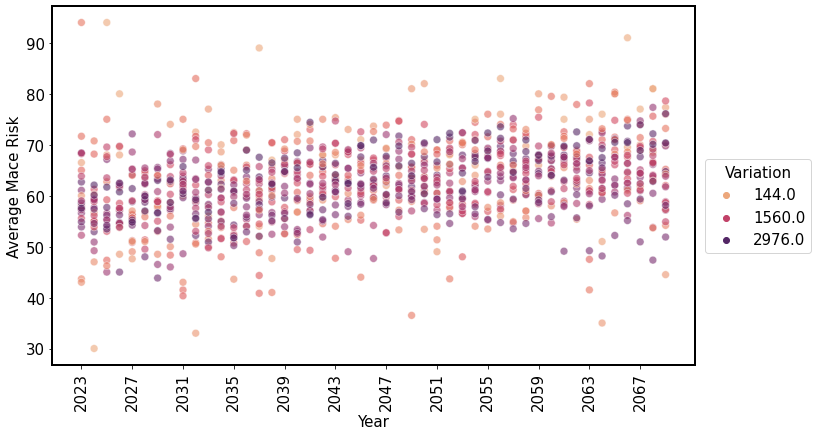

In [47]:
fig, ax = plt.subplots(1,1, figsize=(10,6))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)


sns.scatterplot(data=sensitivity, x="cols", y="vals", s=60, hue="num_agents", alpha=0.6, ax=ax, palette= sns.color_palette("flare", len(sensitivity.num_agents.unique())), sizes=(50, 250), size_norm=(-.2, .8))


handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
# ax.legend([handles[0], handles[len(handles)//2], handles[-1]], [labels[0], labels[len(labels)//2], labels[-1]])

fig.legend([handles[0], handles[len(handles)//2], handles[-1]], [labels[0], labels[len(labels)//2], labels[-1]], loc='center right', bbox_to_anchor=(0.65, 0., 0.5, 1), title="Variation")
fig.tight_layout()

#plt.title('Sensitivity analysis, number of agents')
plt.ylabel('Average Mace Risk')
plt.xlabel('Year')

ax.set_xticks(range(0, sensitivity.cols.max(), 4))
ax.set_xticklabels(range(2023, 2023 + sensitivity.cols.max(), 4))
plt.xticks(rotation=90)

plt.savefig("D:/juju/lumc/msc_thesis/report/images/sens_number_of_agents.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()
